<h1>Анализ влияния различных факторов на надежность заемщиков банка<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Анализ-факторов" data-toc-modified-id="Анализ-факторов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ факторов</a></span><ul class="toc-item"><li><span><a href="#Влияние-количества-детей-на-возврат-кредита-в-срок" data-toc-modified-id="Влияние-количества-детей-на-возврат-кредита-в-срок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Влияние количества детей на возврат кредита в срок</a></span></li><li><span><a href="#Влияние-семейного-положения-на-возврат-кредита-в-срок" data-toc-modified-id="Влияние-семейного-положения-на-возврат-кредита-в-срок-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Влияние семейного положения на возврат кредита в срок</a></span></li><li><span><a href="#Влияние-уровня-дохода-на-возврат-кредита-в-срок" data-toc-modified-id="Влияние-уровня-дохода-на-возврат-кредита-в-срок-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние уровня дохода на возврат кредита в срок</a></span></li><li><span><a href="#Влияние-цели-кредита-на-его-возврат-в-срок" data-toc-modified-id="Влияние-цели-кредита-на-его-возврат-в-срок-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Влияние цели кредита на его возврат в срок</a></span></li></ul></li><li><span><a href="#Модель-скоринга" data-toc-modified-id="Модель-скоринга-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Модель скоринга</a></span></li><li><span><a href="#Итог-и-рекомендации" data-toc-modified-id="Итог-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итог и рекомендации</a></span></li></ul></div>

## Описание проекта

**Область исследования**:\
Статистика о платёжеспособности клиентов банка-заказчика.

**Задача**:\
Необходимо оценить влияние семейного положения и количества детей клиента на факт погашения им кредита в срок.\
Результаты исследования будут учтены при построении модели кредитного скоринга — системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Структура данных**:
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('/Users/mariiasergeeva/Desktop/data.csv')
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Предварительно видим, что в некоторых столбцах количество значений отличается. Это может указывать на пропуски в датасете.

Дополнительно оценим разброс данных на графиках:

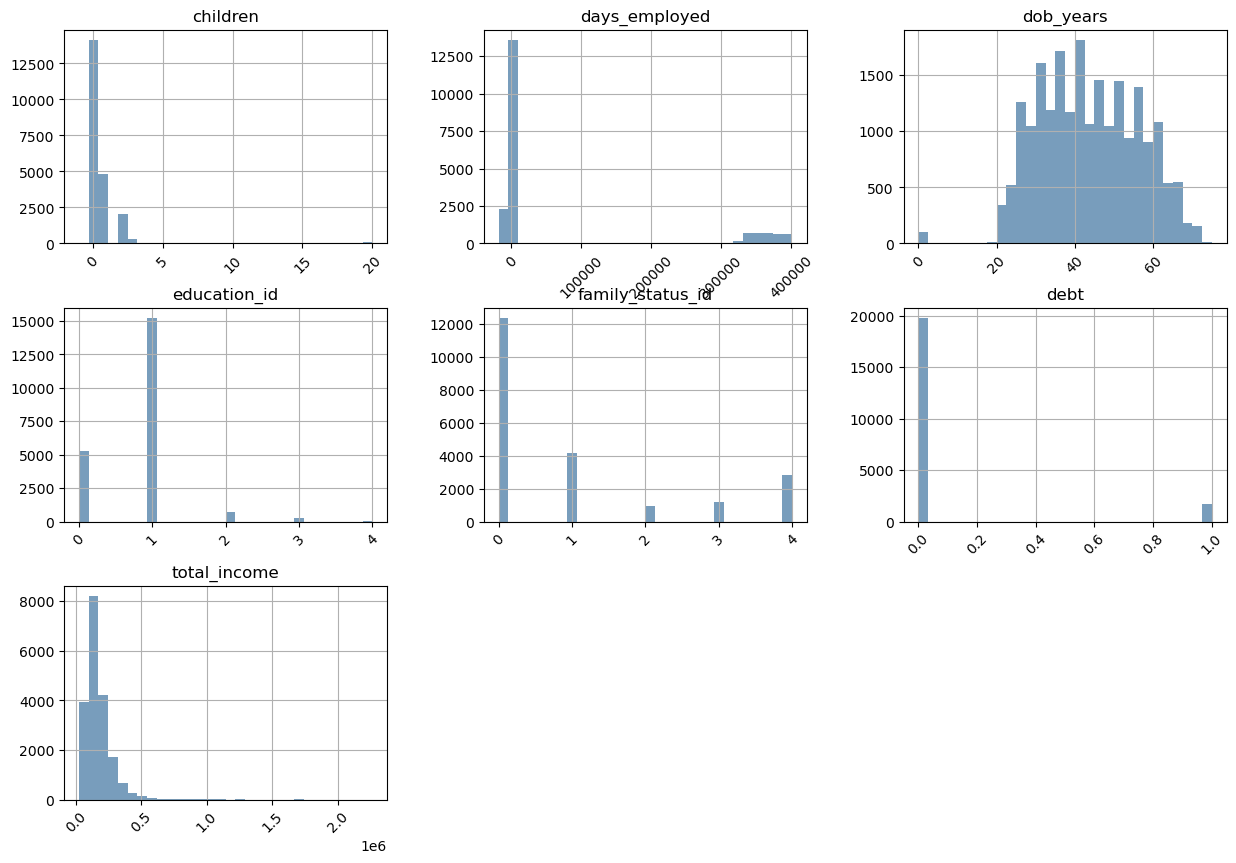

In [4]:
ax = data.hist(figsize=(15, 10), bins=30, color='#789DBC')
for axis in ax.flatten():
    axis.tick_params(axis='x', rotation=45)
plt.show()

## Предобработка данных

### Удаление пропусков

<a id="section_1"></a>

Оценим количество пропусков в колонках:

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed` и `total_income` — хранит данные о доходах.\
В `total_income` заполним пропуски медианным значением по каждому типу из столбца `income_type`.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`:

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()),
             'days_employed'] = data.loc[(data['income_type'] == t),
                                         'days_employed'].median()

data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Обработка аномальных значений

Оценим данные на аномальность значений:

In [8]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,63550.497071,43.293380,0.817236,0.972544,0.080883,1.652253e+05
std,1.381587,141150.420058,12.574584,0.548138,1.420324,0.272661,9.804367e+04
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2570.047544,33.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,-1355.683356,42.000000,1.000000,0.000000,0.000000,1.425944e+05
75%,1.000000,-316.240646,53.000000,1.000000,1.000000,0.000000,1.955499e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Видим, что в 'days_employed' есть отрицательные значения. Нормализуем их:

In [9]:
data['days_employed'] = data['days_employed'].abs()
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,67299.486032,43.293380,0.817236,0.972544,0.080883,1.652253e+05
std,1.381587,139401.804684,12.574584,0.548138,1.420324,0.272661,9.804367e+04
min,-1.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,1025.549623,33.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,1993.522017,42.000000,1.000000,0.000000,0.000000,1.425944e+05
75%,1.000000,5347.024506,53.000000,1.000000,1.000000,0.000000,1.955499e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях:

In [10]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) видим аномально большие значения. На данном этапе исправить такие значения сложно, поэтому пока оставим их как есть.

Выведем перечень уникальных значений столбца `children`:

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Видим аномальные значения: -1 и 20. Удалим строки, где встречаются эти значения:

In [12]:
data = data[(data['children'] != -1) & (data['children'] != 20)]
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`:

In [13]:
data['total_income'] = data['total_income'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     21402 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      21402 non-null  int64  
 11  purpose           21402 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


### Обработка дубликатов

Оценим количество строк-дубликатов:

In [14]:
data.duplicated().sum()

54

Удалим и проверим снова:

In [15]:
data = data.drop_duplicates()
data.duplicated().sum()

0

Оценим значения в столбце 'education':

In [16]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Видим дубликаты с использованием заглавных и строчных букв. Приведите их к нижнему регистру:

In [17]:
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

### Категоризация данных

Для будущей оценки и моделирования скоринга, необходимо укрупнить выборки. На основании диапазонов, указанных ниже, создадим в нашем датафрейме столбец `total_income_category` с категориями по доходу клиентов:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E', '<= 30000'
        elif 30001 <= income <= 50000:
            return 'D', '30001-50000'
        elif 50001 <= income <= 200000:
            return 'C', '20001-50000'
        elif 200001 <= income <= 1000000:
            return 'B', '50001-1000000'
        elif income >= 1000001:
            return 'A', '>= 1000001'
    except:
        pass


data['total_income_category'] = data['total_income'].apply(categorize_income)

In [19]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"(B, 50001-1000000)"
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"(C, 20001-50000)"
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"(C, 20001-50000)"


Оценим список уникальных целей взятия кредита из столбца `purpose`:

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Так же укрупним их и создадим новый столбец `purpose_category`, в который войдут следующие категории:
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'


data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [22]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"(B, 50001-1000000)",операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"(C, 20001-50000)",операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"(C, 20001-50000)",операции с недвижимостью


## Анализ факторов

Подстрахуемся и сделаем копию нашего датафрейма:

In [23]:
datas = data.copy()

Соберем общую функцию, которую будем переиспользовать для анализа разных факторов:

In [24]:
def analyze_debt(dataframe, group_by_column):
    #сгруппируем данные
    group = dataframe.groupby([group_by_column,
                               'debt']).size().unstack(fill_value=0)
    group.columns = ['no_debt', 'has_debt']
    #вычислим проценты
    group['no_debt %'] = (group['no_debt'] /
                          (group['no_debt'] + group['has_debt'])) * 100
    group['has_debt %'] = (group['has_debt'] /
                           (group['no_debt'] + group['has_debt'])) * 100
    #отсортируем по проценту отсутствия задолженности
    group.sort_values('no_debt %', ascending=False, inplace=True)
    #округлим значения для читабельности
    group = round(group, 2)

    return group

### Влияние количества детей на возврат кредита в срок

<a id="section_2"></a>

In [25]:
display(analyze_debt(datas, 'children'))

,no_debt,has_debt,no_debt %,has_debt %
children,,,,
5,9,0,100.00,0.00
0,13044,1063,92.46,7.54
3,303,27,91.82,8.18
1,4365,444,90.77,9.23
2,1858,194,90.55,9.45
4,37,4,90.24,9.76


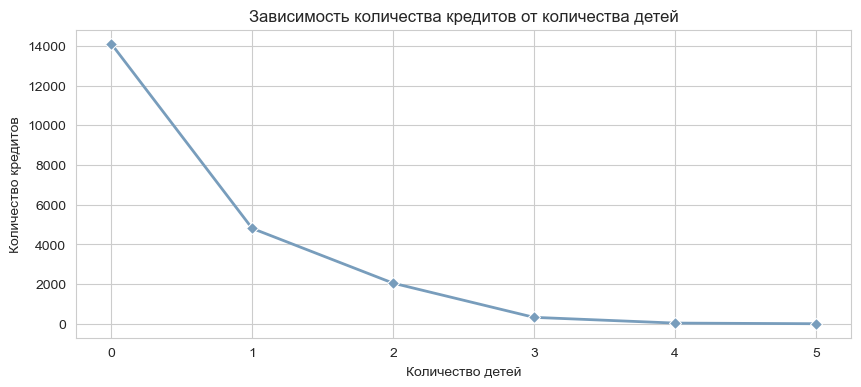

In [26]:
# готовим данные для подсчёта кредитов в зависимости от количества детей
data_ch = datas.groupby('children')[['children']].count()
# применяем стиль whitegrid из библиотеки seaborn
sns.set_style('whitegrid')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим линейный график средствами seaborn
sns.lineplot(
    x=data_ch.index,
    y='children',
    data=data_ch,
    marker='D',
    color='#789DBC',  # Цвет линии и маркера
    linewidth=2       # Толщина линии
)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Зависимость количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')

# отображаем график на экране
plt.show()

**Вывод:**

<u>Существует 2 наиболее платежеспособные группы:</u>
- **5 детей**: самые приоритетные кандидаты на выдачу кредита. Они **всегда платят в срок**, хоть и занимают реже остальных групп.
- **0 детей**: хоть и 7% имеют долги, но кредитов они **берут больше остальных**. А значит, банк может иметь на них **максимальную маржинальность** даже с учетом потерь.


<u>Наименее платежеспособная группа:</u>
- **4 детей**: кредиты **берут редко** - на больших объемах заемщиков прибыль с них не получить. **Долги отдают хуже остальных** групп. 

### Влияние семейного положения на возврат кредита в срок

<a id="section_3"></a>

In [27]:
display(analyze_debt(datas, 'family_status'))

,no_debt,has_debt,no_debt %,has_debt %
family_status,,,,
вдовец / вдова,888,63,93.38,6.62
в разводе,1105,84,92.94,7.06
женат / замужем,11339,927,92.44,7.56
гражданский брак,3761,385,90.71,9.29
Не женат / не замужем,2523,273,90.24,9.76


**Вывод:** 

<u>Наиболее платежеспособная группа:</u>
- **женат/замужем**: хоть и 7,5% имеют долги, но кредитов они **берут больше остальных**. А значит, банк может иметь на них **максимальную маржинальность** даже с учетом потерь.

<u>Наименее платежеспособная группа:</u>
- **Не женат/не замужем**: один из десяти заемщиков не возвращает деньги - это **самый высокий процент задолженностей** при среднем объёме заемщиков. 

Остальные группы заемщиков имеют средний приоритет при соотношении задолженность/объем кредитов. Ключевым фактором является - был/есть ли у заемщика супруг.

### Влияние уровня дохода на возврат кредита в срок

<a id="section_5"></a>

Оценим разброс данных, прежде, чем работать с группами:

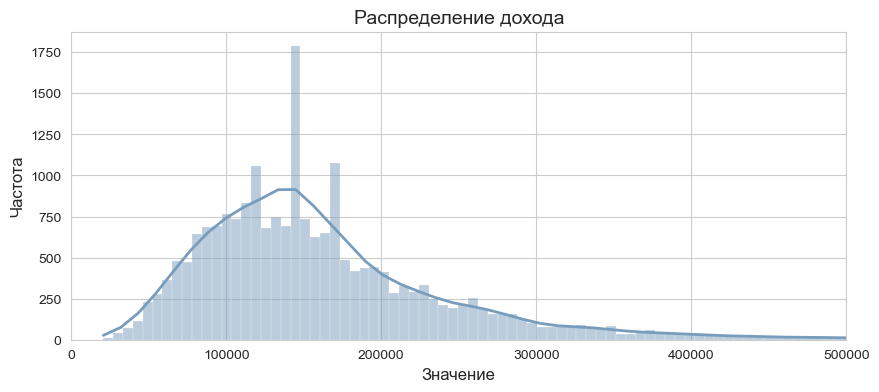

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))

sns.histplot(x='total_income',
             data=datas,
             kde=True,
             color='#789DBC',
             line_kws={
                 'linewidth': 2,
                 'color': '#789DBC'
             })

plt.xlim(0, 500000)

plt.title('Распределение дохода', fontsize=14)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.show()

In [29]:
display(analyze_debt(datas, 'total_income_category'))

,no_debt,has_debt,no_debt %,has_debt %
total_income_category,,,,
"(D, 30001-50000)",328,21,93.98,6.02
"(B, 50001-1000000)",4660,354,92.94,7.06
"(A, >= 1000001)",23,2,92.00,8.00
"(C, 20001-50000)",14585,1353,91.51,8.49
"(E, <= 30000)",20,2,90.91,9.09


**Вывод:** 

<u>Наиболее платежеспособные группы:</u>
- **B, 50001-1000000**: клиенты с оптимальным соотношением дохода/объема кредитом/процентом задолженности. Есть гипотеза, что такие клиенты **будут брать большие суммы/чаще/отдавать охотнее остальных**
- **A, >= 1000001**: хоть они берут почти меньше всех. Но гипотетически, суммы их займа достаточно высокие, чтобы банк имел один из наибольших итоговых доходностей на процентах

<u>Наименее платежеспособная группа:</u>
- **E, <= 30000**: минимальный доход и спрос на кредиты, максимальная задолженность по возвратам.

Остальные группы заемщиков имеют средний приоритет.

### Влияние цели кредита на его возврат в срок

<a id="section_4"></a>

In [30]:
display(analyze_debt(datas, 'purpose_category'))

,no_debt,has_debt,no_debt %,has_debt %
purpose_category,,,,
операции с недвижимостью,9974,780,92.75,7.25
проведение свадьбы,2141,183,92.13,7.87
получение образования,3620,369,90.75,9.25
операции с автомобилем,3881,400,90.66,9.34


**Вывод:** 

Первый приоритет: **операции с недвижимостью**. Максимальные спрос/суммы/процент возврата.

Второй приоритет: **проведение свадьбы**. Явно суммы здесь гораздо меньшие, чем на покупку жилья, но зато высокий процент возврата.

Остальные категории имеют средний приоритет.\
Тендеция схожа с результатами по семейному положению: кредиты охотнее возвращают те, у кого есть или планируется партнер (делаю допущение, что на недвижимость чаще берут с обретением/расширением семьи).

## Модель скоринга

Помним, что итоговый результат бизнеса - модель кредитного скоринга. 
Оценкой сверху, можно сказать, что критерии, которые мы исследовали, стоит включить в эту модель.

Для итогового решения, пробую собрать сводную таблицу с парметрами:

|Первый приоритет|Второй приоритет|Третий приоритет|Четвертый приоритет|Последний приоритет|
|----------------|----------------|----------------|-------------------|-------------------|
|5 детей|0 детей|3 детей|1 ребенок|2 или 4 ребенка|
|женат/замужем|вдовец/вдова|в разводе|гражданский брак|Не женат/не замужем|
|B, 50001-1000000|A, >= 1000001|C, 20001-50000|D, 30001-50000|E, <= 30000|
|операции с недвижимостью|проведение свадьбы|получение образования|получение образования|операции с автомобилем|



Кажется, что да, логика оценки становится более явной. Но клиенты не такие одномерные, как указано в столбцах, поэтому пробую собрать прототип скоринга:

In [31]:
#собираем в словарь все критерии и распределяем по ним веса
credit_score = {
    '5 детей': 5,
    'женат/замужем': 5,
    'B, 50001-1000000': 5,
    'операции с недвижимостью': 5,
    '0 детей': 4,
    'вдовец/вдова': 4,
    'A, >= 1000001': 4,
    'проведение свадьбы': 4,
    '3 детей': 3,
    'в разводе': 3,
    'C, 20001-50000': 3,
    'получение образования': 3,
    '2 ребенка': 2,
    '1 ребенок': 2,
    'гражданский брак': 2,
    'D, 30001-50000': 2,
    '4 ребенка': 1,
    'Не женат/не замужем': 1,
    'E, <= 30000': 1,
    'операции с автомобилем': 1,

    #чтобы модель не заваливалась от неприоритетных параметров, приоритезируем недостающую информацию отрицательными весами
    'доход не определен': -5,
    'количество детей не определено': -2,
    'цель кредита не определена': -3,
    'семейное положение не определено': -1
}


#функция проходится по словарю, на основании входящих параметров
def calculate_score_and_decision(criteria):
    total_score = 0
    for criterion in criteria:
        if criterion in credit_score:
            total_score += credit_score[criterion]


#задаем вывод итогового решения, на основе итоговой оценки
    if 0 <= total_score <= 7:
        return total_score, "кредит не одобрен, запросите дополнительные документы"
    elif 8 <= total_score <= 12:
        return total_score, "высокорисковый кредит, запросите дополнительные документы"
    elif 13 <= total_score <= 20:
        return total_score, "кредит одобрен"
    else:
        return total_score, "решение по кредиту не определено"

In [32]:
#пример использования
criteria_list = ['0 детей', 'женат/замужем', 'операции с недвижимостью', 'доход не определен']
score, decision = calculate_score_and_decision(criteria_list)
print(f"Очки: {score}, Решение: {decision}")

Очки: 9, Решение: высокорисковый кредит, запросите дополнительные документы


## Итог и рекомендации


# В ходе проекта были проанализировано влияние на факт погашения кредита в срок нескольких факторов: # 
- [количество детей: чем меньше детей, тем лучше отдаются займы](#section_2)
- [семейное положение: если у заемщика был/есть супруг, то кредит отдается лучше](#section_3)
- [цель кредита: если цель перекликается с семейными целями (расширение площади жилья, свадьба), то кредит возвращается охотнее](#section_4)

    
**Промежуточные выводы:**

Да, корреляция между этими факторами и погашением кредита существует.



Так же, в анализ [планироавлось включить параметр влияния уровня дохода на возвратность кредита](#section_5). 
    
На текущем этапе однозначные выводы сделать сложно, т.к. в ходе обработки данных, было выявлено, что 10% данных отсутствовало (ежемесячный доход и общий трудовой стаж в днях).

<br>
  
**Потенциальные причины:**
1. человеческий фактор: 
    - отсутствие дохода и стажа впринципе
    - несистемный заработок и стаж, которые сложно подсчитать
    - получение дохода и стажа "в серую" (= потенциальное нежелание афишировать)   
2. технический фактор: 
    - формат хранения данных не учтен при выгрузке и они были утеряны. 
Эта причина наиболее вероятна: данных одинаково не хватает в двух столбцах.
    
   


# Итог и рекомендации: # 
1. в итоговую модель скоринга стоит включить факторы: количество детей, семейное положение, цель кредита
2. при анализе других параметров (в т.ч. уровнь дохода), необходимо исключить фактор некорректной выгрузки данных.

В случае, если причина недостачи в человеческом факторе, необходимо проработать увеличение активации клиента в заполнение недостающих данных (предзаданные диапазоны и т.п)
